# Multivariate Parametric Classification
## Emre Can Açıkgöz / 63492
### November 9, 2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Generate random data points

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([[+0.0, +2.5],
                        [-2.5, -2.0],
                        [+2.5, -2.0]])
# covariance parameters
class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]],
                              [[+1.2, +0.8], 
                               [+0.8, +1.2]]])
# sample sizes
class_sizes = np.array([120, 90, 90])

## Data Generation

In [3]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Exporting Data

In [4]:
# write data to a file
np.savetxt("data_set.csv",  np.hstack((X, y[:, None])), fmt = "%f,%f,%d")

## Plotting Data

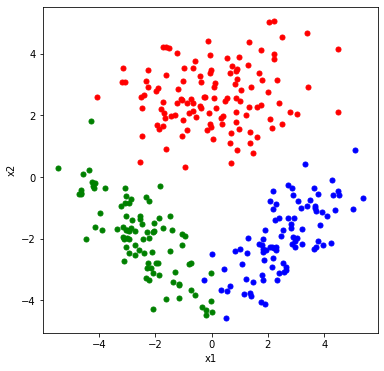

In [5]:
# plot data points generated
plt.figure(figsize = (6,6))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Importing Data

In [6]:
# read data into memory
data_set = np.genfromtxt("data_set.csv", delimiter = ",")

# get X and y values
X = data_set[:,[0,1]]
y_truth = data_set[:,2].astype(int)

# get number of classes and number of samples
K = np.max(y_truth)
N = data_set.shape[0]

# Part 2: Estimate Parameters

## Parameter Estimation

$\mu_{c}^{\star} = \dfrac{\sum\limits_{i = 1}^{N} x_{i} \mathbb{1}(y_{i} = c)}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [7]:
# calculate sample means
sample_means = [np.mean(X[y_truth == (c+1)], axis=0) for c in range(K)]
print(sample_means)

[array([0.04453807, 2.61225132]), array([-2.48491072, -1.94817984]), array([ 2.54954733, -1.98880993])]


In [8]:
sample_means1 = np.mean(X[y_truth == (1)], axis=0)
sample_means2 = np.mean(X[y_truth == (2)], axis=0)
sample_means3 = np.mean(X[y_truth == (3)], axis=0)
print(sample_means1)
print(sample_means2)
print(sample_means3)

[0.04453807 2.61225132]
[-2.48491072 -1.94817984]
[ 2.54954733 -1.98880993]


${\sum}^{\star} = \dfrac{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)(x_{i} - \mu_{c}^{\star})(x_{i} - \mu_{c}^{\star})^{T}}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [10]:
# calculate sample covariances
sample_covariances1 = np.cov(X[y_truth == (1)].T)
sample_covariances2 = np.cov(X[y_truth == (2)].T)
sample_covariances3 = np.cov(X[y_truth == (3)].T)
sample_covariances = np.vstack([sample_covariances1,sample_covariances2,sample_covariances3])
sample_covariances

[array([[2.83985863, 0.22625047],
        [0.22625047, 1.01248432]]),
 array([[ 1.54796964, -1.2021398 ],
        [-1.2021398 ,  1.59048418]]),
 array([[1.41502264, 0.93329243],
        [0.93329243, 1.2618516 ]])]

In [11]:
sample_covariances = np.vstack([sample_covariances1,sample_covariances2,sample_covariances3])
sample_covariances

array([[ 2.83985863,  0.22625047],
       [ 0.22625047,  1.01248432],
       [ 1.54796964, -1.2021398 ],
       [-1.2021398 ,  1.59048418],
       [ 1.41502264,  0.93329243],
       [ 0.93329243,  1.2618516 ]])

In [11]:
samp_cov = [np.cov(X[y_truth == (c+1)].T) for c in range(K)]
samp_cov

[array([[2.83985863, 0.22625047],
        [0.22625047, 1.01248432]]),
 array([[ 1.54796964, -1.2021398 ],
        [-1.2021398 ,  1.59048418]]),
 array([[1.41502264, 0.93329243],
        [0.93329243, 1.2618516 ]])]

$\hat{P}(y_{i} = c) = \dfrac{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}{N}$

In [12]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors)

[0.4, 0.3, 0.3]


# Part 3: Parametric Classification

## Parameters

In [13]:
# Initialize parameters
W = [-0.5 * np.linalg.inv(sample_covariances[c]) for c in range(K)]
w = [np.matmul(np.linalg.inv(sample_covariances[c]), sample_means[c]) for c in range(K)]
w0 = [(-0.5 * np.matmul(np.matmul(sample_means[c].T, np.linalg.inv(sample_covariances[c])), sample_means[c]) - 0.5 * np.log(np.linalg.det(sample_covariances[c])) + class_priors[c]) for c in range(K)]

## Discriminant Function

$\begin{align*}
g_{c}(x) &= \log p(x | y = c) + \log P(y = c)\\
\end{align*}$

$\begin{align*}
g_{c}(x) &=\boldsymbol{x}^{\top}\boldsymbol{W_{c}} \boldsymbol{x} + \boldsymbol{w_{c}}^{\top}\boldsymbol{x} + w_{0}
\end{align*}$

In [14]:
# Class prediction list
y_predict=[]

# Implement discriminant function and take the class predictions to a list using paramters
for element in X:
    list_prob = [np.matmul(np.matmul(element.T, W[c]), element) + np.matmul(w[c].T, element) + w0[c] for c in range(K)]
    y_predict.append(list_prob.index(max(list_prob)) + 1)

In [15]:
# Make array list
y_predicted = np.asarray(y_predict)

## Confusion Matrix

In [16]:
# Confusion matrix
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_predicted'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth        1   2   3
y_predicted             
1            120   1   0
2              0  89   1
3              0   0  89


# Part 4: Visualization

## Plot y_predictions and Specify Missclassifieds

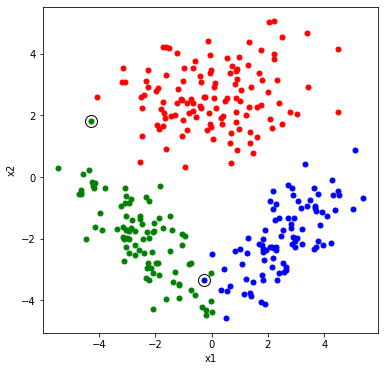

In [17]:
# Data projected figure with missclassified ones as we can check form Confusion Matrix
plt.figure(figsize = (6, 6))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Draw Decision Boundaries

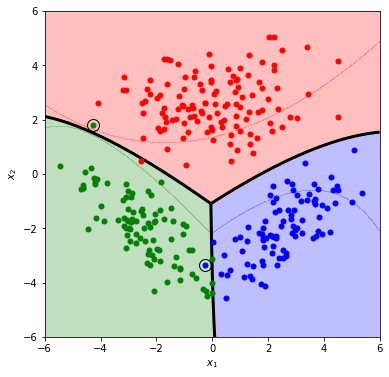

In [18]:
# Evaluate discriminant function on a grid
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(3): 
    discriminant_values[:,:,c] = x1_grid*(W[c][0,0]*x1_grid + W[c][0,1]) + x2_grid.T*(W[c][1,0]*x2_grid +W[c][1,1]) + x1_grid*w[c][0].T + x2_grid*w[c][1].T + w0[c]
        
A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C
    
plt.figure(figsize = (6, 6))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k", linewidths =3)
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k", linewidths =3)
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k", linewidths =3)
A[(A < B) | (A < C)] = np.nan
B[(B < A) | (B < C)] = np.nan
C[(C < A) | (C < B)] = np.nan
plt.contourf(x1_grid, x2_grid, A, levels=0, alpha=0.25, colors='red')
plt.contourf(x1_grid, x2_grid, B, levels=0, alpha=0.25, colors='green')
plt.contourf(x1_grid, x2_grid, C, levels=0, alpha=0.25, colors='blue')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()